In [1]:
## Installing useful packages
!pip install wget
!pip install py7zr
!pip install torchinfo

In [2]:
## Load useful packages
import py7zr
from zipfile import ZipFile
from random import sample
import PIL.Image as Image
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split, KFold # KFold is added by Atif
import os
import h5py
import numpy as np
import wget
from zipfile import ZipFile

In [3]:
data_path = 'https://raw.githubusercontent.com/Shujaat123/Ear_Biometrics/main/utilities.py'
filename = 'utilities.py'

if(os.path.exists(filename)):
  !rm $filename
  print('existing file:', filename, ' has been deleted')
print('downloading latest version of file:', filename)
wget.download(data_path, filename)
print('sucessfully downloaded')

data_path = 'https://raw.githubusercontent.com/Shujaat123/Ear_Biometrics/main/custom_models.py'
filename = 'custom_models.py'

if(os.path.exists(filename)):
  !rm $filename
  print('existing file:', filename, ' has been deleted')
print('downloading latest version of file:', filename)
wget.download(data_path, filename)
print('sucessfully downloaded')

existing file: utilities.py  has been deleted
downloading latest version of file: utilities.py
sucessfully downloaded
existing file: custom_models.py  has been deleted
downloading latest version of file: custom_models.py
sucessfully downloaded


In [4]:
from utilities import load_dataset
# LOADING Dataset
ear_images, sub_labels = load_dataset(dataset='AMI', target_size =(246, 351))
# ear_images, sub_labels = load_dataset(dataset='IITD_dataset', target_size = (50, 180))

existing file: AMI_dataset.zip  has been deleted
downloading latest version of file: AMI_dataset.zip
sucessfully downloaded
['.config', 'AMI_dataset.zip', 'custom_models.py', 'AMI_dataset', '__pycache__', 'utilities.py', 'sample_data']
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ear_images, sub_labels, test_size=0.142, random_state=42, stratify=sub_labels) # for AMI dataset

# X_train, X_test, y_train, y_test = train_test_split(ear_images, sub_labels, test_size=0.382093316519, random_state=42, stratify=sub_labels)  # for IITD dataset
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.386363636363, random_state=42, stratify=y_train)

print('Training dataset:\n',X_train.shape)
print(y_train.shape)
# print('Validation dataset:\n',X_valid.shape)
# print(y_valid.shape)
print('Test dataset:\n',X_test.shape)
print(y_test.shape)

Training dataset:
 (600, 3, 351, 246)
(600,)
Test dataset:
 (100, 3, 351, 246)
(100,)


In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn
import torch.nn.functional
import torch.optim
from torchvision import models #just for debugging
from custom_models import LSE_model, Feature_Extraction_Module, Feature_Decoder_Module, AutoEncoder_model, Simple_Classification_model

In [7]:
from torchinfo import summary
num_classes=np.unique(y_train).shape[0]
num_filters=8
input_shape=(X_train.shape[2],X_train.shape[3],X_train.shape[1])
# input_shape=(702,492,3)
model = LSE_model(input_shape=input_shape)
summary(model, input_size=(1, input_shape[2], input_shape[0],input_shape[1]))

/content/custom_models.py:234: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.fc1_activation(out)


Layer (type:depth-idx)                   Output Shape              Param #
LSE_model                                [1, 100]                  --
├─Feature_Extraction_Module: 1-1         [1, 256, 10, 7]           --
│    └─Conv2d: 2-1                       [1, 8, 351, 246]          224
│    └─ReLU: 2-2                         [1, 8, 351, 246]          --
│    └─MaxPool2d: 2-3                    [1, 8, 175, 123]          --
│    └─Conv2d: 2-4                       [1, 16, 175, 123]         1,168
│    └─ReLU: 2-5                         [1, 16, 175, 123]         --
│    └─BatchNorm2d: 2-6                  [1, 16, 175, 123]         32
│    └─MaxPool2d: 2-7                    [1, 16, 87, 61]           --
│    └─Conv2d: 2-8                       [1, 32, 87, 61]           4,640
│    └─ReLU: 2-9                         [1, 32, 87, 61]           --
│    └─MaxPool2d: 2-10                   [1, 32, 43, 30]           --
│    └─Conv2d: 2-11                      [1, 64, 43, 30]           18,496
│   

(600, 3, 351, 246) torch.Size([600, 3, 351, 246])


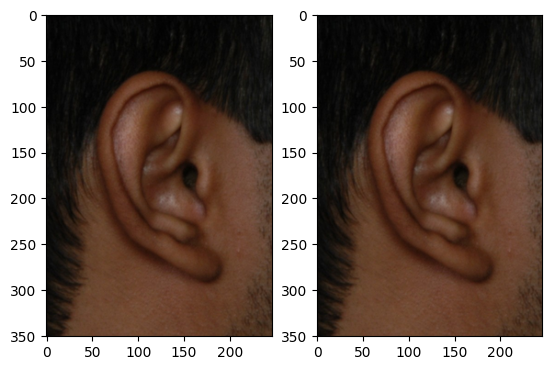

In [8]:
import random
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        if(random.choice([0, 1])):
          return tensor + torch.randn(tensor.size()) * self.std + self.mean
        else:
          return tensor

    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

import torchvision.transforms as T

transform = T.Compose(
    [
        # T.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        # T.RandomRotation((-5,5)),
        # T.RandomAffine(degrees=(-5, 5), translate=(0, 0.3), scale=(0.5, 1.5)),
        # T.RandomVerticalFlip(p=0.25),
        # T.RandomHorizontalFlip(p=0.25),
        # T.ElasticTransform(alpha=10.0),
        AddGaussianNoise(0., 0.02)
    ]
)
transformed_X_train = transform(torch.tensor(X_train))
print(X_train.shape, transformed_X_train.shape)

plt.figure()
plt.subplot(1,2,1)
if (len(X_train[0].squeeze().shape)>2):
  plt.imshow(np.transpose(X_train[0].squeeze(),(1,2,0)))
  plt.subplot(1,2,2)
  plt.imshow(np.transpose(transformed_X_train[0].squeeze(),(1,2,0)))
else:
  plt.imshow(X_train[0].squeeze())
  plt.subplot(1,2,2)
  plt.imshow(transformed_X_train[0].squeeze())

In [9]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

num_classes=np.unique(y_train).shape[0]
num_filters=8
input_shape=(X_train.shape[2],X_train.shape[3],X_train.shape[1])
model = LSE_model(num_classes=num_classes, num_filters=num_filters,input_shape=input_shape).to(torch.device('cuda'))
optimizer = torch.optim.Adam(model.parameters())

# manaul training
def train_one_epoch(lambda1=0.5, lambda2=0.5, model_type='DeepLSE'):
    # training metrics
    train_loss = 0
    train_correct = 0

    # validation metrics
    valid_loss = 0
    valid_correct = 0


    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    model.train(True)
    if(model_type=='Classifier'):
      lambda1=1;
      lambda2=0;
      ct = 0
      for child in model.children():
        ct += 1
        if ct == 2: # turn off weigth update for Encoder and Decoder modules
            for param in child.parameters():
                param.requires_grad = True
        else:
            for param in child.parameters():
                param.requires_grad = False
    elif(model_type=='Encoder+Classifier'):
      lambda1=1;
      lambda2=0;
      ct = 0
      for child in model.children():
        ct += 1
        if ct == 3: # turn off weigth update for Decoder module only
            for param in child.parameters():
                param.requires_grad = False
        else:
            for param in child.parameters():
                param.requires_grad = True
    elif(model_type=='AutoEncoder'):
      lambda1=0;
      lambda2=1;
      ct = 0
      for child in model.children():
        ct += 1
        if ct == 2: # turn off weigth update for Classifier module
            for param in child.parameters():
                param.requires_grad = False
        else:
            for param in child.parameters():
                param.requires_grad = True
    elif(model_type=='DeepLSE'): # train full-network
      for child in model.children():
        for param in child.parameters():
            param.requires_grad = True
    else:
      print('Incorrect choice for model configuration')

    for i, data in enumerate(training_loader,0):
        # Every data instance is an input + label pair
        train_input, train_label = data
        # train_input = train_input.unsqueeze(dim=1).float()
        train_label= torch.tensor(to_categorical(y=train_label, num_classes=num_classes)).float()
        # train_label = train_label[:,None]
        if len(train_label.shape)==1:
          train_label = train_label.unsqueeze(dim=0)

        train_input = train_input.to(torch.device('cuda'))
        train_label = train_label.to(torch.device('cuda'))

        # print('train_input:',train_input.shape, 'train_label:',train_label.shape)

        # Zero your gradients for every batch!
        optimizer.zero_grad()
        # optimizer_classifier.zero_grad()

        # Make predictions for this batch
        # train_features_output = feature_extraction_module(train_input)
        # train_output = classifier_module(train_features_output)
        # train_output = pytorch_model_c1(train_input)
        train_output, decoded_input = model(train_input)

        # print('train_input:',train_input.shape, 'train_label:',train_label.shape, 'train_output:',train_output.shape)
        # print('train_label:',train_label)
        # print('train_output:',train_output)

        # Compute the loss and its gradients
        loss = 2*(lambda1)*loss_fn(train_output, train_label)
        loss = loss + 2*(lambda2)*loss_fn2(train_input, decoded_input)

        loss.backward()

        # Adjust learning weights
        optimizer.step()
        # optimizer_classifier.step()

        # Gather data and report
        train_loss += loss.item()
        for batch_count in range(train_output.shape[0]):
          if(torch.argmax(train_output[batch_count,:]) == torch.argmax(train_label[batch_count,:])):
            train_correct += 1

    # print('training epoch complete')
    # Here, we use enumerate(validation_loader) instead of
    # iter(validation_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    model.train(False)
    for i, data in enumerate(validation_loader,0):
        # Every data instance is an input + label pair
        valid_input, valid_label = data

        # valid_input = valid_input.unsqueeze(dim=1).float()
        valid_label= torch.tensor(to_categorical(y=valid_label, num_classes=num_classes)).float()
        if len(valid_label.shape)==1:
          valid_label = valid_label.unsqueeze(dim=0)

        valid_input = valid_input.to(torch.device('cuda'))
        valid_label = valid_label.to(torch.device('cuda'))

        # Make predictions for this batch
        valid_output, temp = model(valid_input)

        # print('valid_input:',valid_input.shape, 'valid_label:',valid_label.shape, 'valid_output:',valid_output.shape)

        # Gather data and report
        valid_loss += loss_fn(valid_output, valid_label).item() + loss_fn2(valid_input, temp).item()
        for batch_count in range(valid_output.shape[0]):
          if(torch.argmax(valid_output[batch_count,:]) == torch.argmax(valid_label[batch_count,:])):
            valid_correct += 1

    training_accuracy = 100*train_correct/training_samples
    validation_accuracy = 100*valid_correct/validation_samples

    return train_loss, training_accuracy, valid_loss, validation_accuracy


In [10]:
#data
training_loader = DataLoader(TensorDataset(transform(torch.tensor(X_train)), torch.tensor(y_train)), batch_size=100, shuffle=True)
validation_loader = DataLoader(TensorDataset(torch.tensor(X_test), torch.tensor(y_test)), batch_size=1)
# added by Atif
training_samples = len(training_loader.dataset)
validation_samples = len(validation_loader.dataset)
# training_loader = DataLoader(TensorDataset(transform(torch.tensor(X_train)), torch.tensor(y_train)), batch_size=10, pin_memory='True', pin_memory_device='cuda', shuffle=True)
# training_loader = DataLoader(TensorDataset(torch.tensor(X_train), torch.tensor(y_train)), batch_size=1, pin_memory='True', pin_memory_device='cuda', shuffle=True)
# validation_loader = DataLoader(TensorDataset(torch.tensor(X_test), torch.tensor(y_test)), batch_size=1, pin_memory='True', pin_memory_device='cuda')
#loss function
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn2 = torch.nn.MSELoss()
# loss_fn = torch.nn.BCELoss()
# loss_fn = torch.nn.BCEWithLogitsLoss()
# Optimizers specified in the torch.optim package
# optimizer_lse = torch.optim.Adam(feature_extraction_module.parameters())
# optimizer_classifier = torch.optim.Adam(classifier_module.parameters())
# optimizer = torch.optim.Adam(pytorch_model_c1.parameters())
# optimizer = torch.optim.Adam(LSE_model.parameters())

# # import EarlyStopping
# from pytorchtools import EarlyStopping

In [11]:
# added by Atif
def checkpoint(model, filename):
  torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
  }, filename)

def resume(model, filename):
  checkpoint = torch.load(filename)
  model.load_state_dict(checkpoint['model'])
  optimizer.load_state_dict(checkpoint['optimizer'])

In [12]:
# Initializing in a separate cell so we can easily add more epochs to the same run
epoch_number = 0
EPOCHS = 50
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

early_stop_thresh = 5
best_validation_accuracy = -1
best_validation_epoch = -1

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    # if (epoch<3):
    #   lambda1=0
    # elif ((epoch>=3)&(epoch<10)):
    #   lambda1=0.2
    # elif ((epoch>=10)&(epoch<20)):
    lambda1=0.5
    lambda2=0.5
    # model_type='DeepLSE'
    # model_type='AutoEncoder'
    # model_type='Classifier'
    model_type='Encoder+Classifier'
    # else:
    #   lambda1=0.6
    # lambda1=(1+epoch)/EPOCHS
    # lambda1 = np.remainder(epoch,2)

    train_loss, training_accuracy, valid_loss, validation_accuracy = train_one_epoch(lambda1=lambda1, lambda2=lambda2, model_type=model_type)

    print(f"Training: \n Training Accuracy: {training_accuracy}%, Average Training Loss: {train_loss/len(training_loader)}")

    print(f"Validation: \n Validation Accuracy: {validation_accuracy}%, Average Validation Loss: {valid_loss/len(validation_loader)}")

    if validation_accuracy > best_validation_accuracy:
      best_validation_accuracy = validation_accuracy
      best_validation_epoch = epoch
      checkpoint(model, "best_model.pth")

    elif epoch - best_validation_epoch > early_stop_thresh:
        print(f"Early stopped training at epoch {epoch}. \nThe epoch of best vaidation accuarcy was {best_validation_epoch} with vaidation accuarcy of {best_validation_accuracy}")
        break  # terminate the training loop

    epoch_number += 1

EPOCH 1:
Training: 
 Training Accuracy: 5.666666666666667%, Average Training Loss: 9.189572811126709
Validation: 
 Validation Accuracy: 19.0%, Average Validation Loss: 4.720736095309258
EPOCH 2:
Training: 
 Training Accuracy: 29.5%, Average Training Loss: 8.955471197764078
Validation: 
 Validation Accuracy: 28.0%, Average Validation Loss: 4.6246891315281395
EPOCH 3:
Training: 
 Training Accuracy: 48.333333333333336%, Average Training Loss: 8.61578098932902
Validation: 
 Validation Accuracy: 43.0%, Average Validation Loss: 4.505317131504416
EPOCH 4:
Training: 
 Training Accuracy: 60.333333333333336%, Average Training Loss: 8.276825110117594
Validation: 
 Validation Accuracy: 47.0%, Average Validation Loss: 4.425071095153689
EPOCH 5:
Training: 
 Training Accuracy: 70.5%, Average Training Loss: 8.014405568440756
Validation: 
 Validation Accuracy: 49.0%, Average Validation Loss: 4.369367593452335
EPOCH 6:
Training: 
 Training Accuracy: 77.66666666666667%, Average Training Loss: 7.817931493

## **K-Fold Validation**

In [13]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

In [15]:
# Initializing in a separate cell so we can easily add more epochs to the same run
# For k fold results
k_folds = 5
results = {}

# Set fixed random number seed
torch.manual_seed(42)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=k_folds, shuffle=True)

dataset = TensorDataset(transform(torch.tensor(ear_images)), torch.tensor(sub_labels))

# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):

  # Print
  print(f'FOLD {fold}')
  print('--------------------------------')

  # Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)

  # Define data loaders for training and testing data in this fold
  trainloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=10, sampler=train_subsampler)
  testloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=1, sampler=test_subsampler)

  epoch_number = 0
  EPOCHS = 10

  # Added by Atif
  # Reset model weights before each fold
  model.apply(reset_weights)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

  early_stop_thresh = 5
  best_validation_accuracy = -1
  best_validation_epoch = -1

  for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))
    # if (epoch<3):
    #   lambda1=0
    # elif ((epoch>=3)&(epoch<10)):
    #   lambda1=0.2
    # elif ((epoch>=10)&(epoch<20)):
    lambda1=0.5
    lambda2=0.5
    # model_type='DeepLSE'
    # model_type='AutoEncoder'
    # model_type='Classifier'
    model_type='Encoder+Classifier'
    # else:
    #   lambda1=0.6
    # lambda1=(1+epoch)/EPOCHS
    # lambda1 = np.remainder(epoch,2)

    train_loss, training_accuracy, valid_loss, validation_accuracy = train_one_epoch(lambda1=lambda1, lambda2=lambda2, model_type=model_type)

    print(f"Training: \n Training Accuracy: {training_accuracy}%, Average Training Loss: {train_loss/len(training_loader)}")

    print(f"Validation: \n Validation Accuracy: {validation_accuracy}%, Average Validation Loss: {valid_loss/len(validation_loader)}")

    if validation_accuracy > best_validation_accuracy:
      best_validation_accuracy = validation_accuracy
      best_validation_epoch = epoch
      checkpoint(model, "best_model.pth")

    elif epoch - best_validation_epoch > early_stop_thresh:
        print(f"Early stopped training at epoch {epoch}. \nThe epoch of best vaidation accuarcy was {best_validation_epoch} with vaidation accuarcy of {best_validation_accuracy}")
        break  # terminate the training loop

    epoch_number += 1


  results[fold] = best_validation_accuracy

# Print fold results
print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.items())} %')




FOLD 0
--------------------------------
Reset trainable parameters of layer = Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
Reset trainable parameters of layer = Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
Reset trainable parameters of layer = BatchNorm2d(16, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
Reset trainable parameters of layer = Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
Reset trainable parameters of layer = Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
Reset trainable parameters of layer = BatchNorm2d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
Reset trainable parameters of layer = Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
Reset trainable parameters of layer = Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
Reset trainable parameters of layer = BatchNorm2d(256, eps=0.001, momentum=0.99, affine=True, track_running_st